Logistic regression in scikit-learn

Logistic regression is implemented in scikit-learn using LogisticRegression(). Once a model is fitted, the estimated intercept is found using the attribute model.intercept_ and the estimated weights are found using model.coef_. Useful parameters for LogisticRegression() are described in the table below. Additional parameters and details can be found in the scikit-learn documentation.

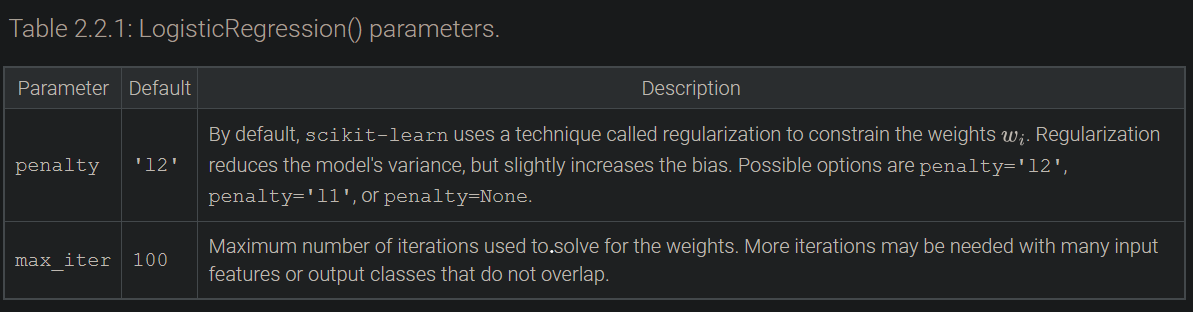

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [19]:
# Load the penguins dataset and drop instances with missing values
penguins = pd.read_csv('penguins.csv').dropna()

In [20]:
# Create binary feature for each species
penguins['Adelie'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
                                                      value = [int(1), int(0), int(0)])
penguins['Chinstrap'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
                                                      value = [int(0), int(1), int(0)])
penguins['Gentoo'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
                                                      value = [int(0), int(0), int(1)])
penguins.head()

C:\Users\Gabe\AppData\Local\Temp\ipykernel_27932\3815399226.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguins['Adelie'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
C:\Users\Gabe\AppData\Local\Temp\ipykernel_27932\3815399226.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguins['Chinstrap'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
C:\Users\Gabe\AppData\Local\Temp\ipykernel_27932\3815399226.py:6: FutureWarning: Downcasting behavior in `replace` is

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,0


In [21]:
# Define input features and output features
X = penguins[['bill_length_mm']]
y = penguins[['Adelie']]

In [23]:
# Initialize a logistic regression model
logisticModel = LogisticRegression(penalty='l2')

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the fitted model
print('w1:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)

w1: [[-1.14305418]]
w0: [49.01692562]


In [6]:
# Calculate predicted probabilities
logisticModel.predict_proba(X)[0:6]

array([[1.17799505e-02, 9.88220049e-01],
       [1.86912372e-02, 9.81308763e-01],
       [4.63761416e-02, 9.53623858e-01],
       [7.15687573e-04, 9.99284312e-01],
       [1.48445101e-02, 9.85155490e-01],
       [9.34205137e-03, 9.90657949e-01]])

In [7]:
# Classify instances in X
logisticModel.predict(X)[0:6]

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
# Calculate the proportion of instances correctly classified
logisticModel.score(X, np.ravel(y))

0.9429429429429429

c:\Users\Gabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Probability of Adelie')

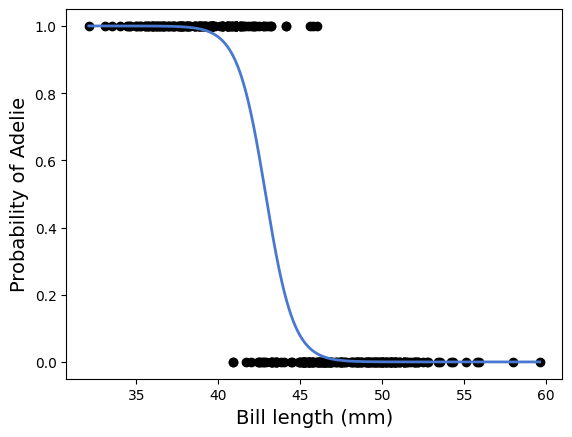

In [9]:
# Plot logistic regression model
plt.scatter(X, y, color='black')

xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logisticModel.predict(X).reshape(-1, 1).astype(int)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]

plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Adelie', fontsize=14)

In [10]:
# Use additional input features
X = penguins[['bill_length_mm', 'bill_depth_mm']]
y = penguins[['Adelie']]

In [11]:
# Initialize a logistic regression model
logisticModel = LogisticRegression(penalty=None)

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the fitted model
print('w1, w2:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)

w1, w2: [[-2.2096875   3.99767721]]
w0: [24.13003698]


In [12]:
# Proportion of instances correctly classified
logisticModel.score(X, y)

0.9819819819819819

c:\Users\Gabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


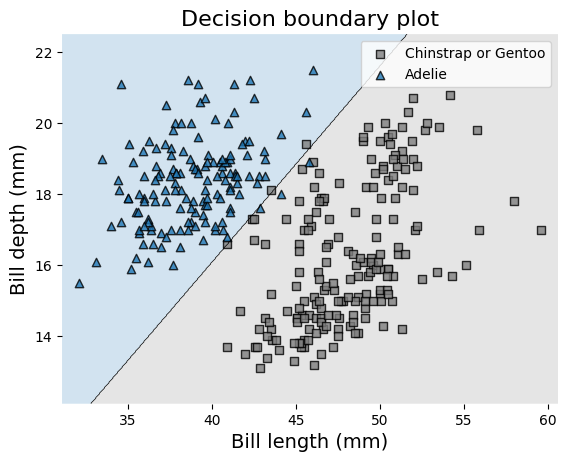

In [13]:
# Decision boundary plot with two input features
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y),
                          clf=logisticModel, contourf_kwargs=contourf_kwargs,
                          colors='#7f7f7f,#1f77b4')

# Add title and axis labels
p.set_title('Decision boundary plot', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)

# Add legend
L = plt.legend()
L.get_texts()[0].set_text('Chinstrap or Gentoo')
L.get_texts()[1].set_text('Adelie')